In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# FIND TOTAL NUMBER OF FEATURES AND DATAPOINTS
df.shape

(1000, 8)

8 features
1000 datapoints

In [4]:
# FIND THE TYPE OF FEATURES
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
# PLAY WITH GENDER
# NULL VALUES
# UNIQUE VALUES
df["gender"].isnull().sum()

0

In [7]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

## GENDER
0 NULL VALUES

2 UNIQUE VALUES

female
male

In [8]:
df["race/ethnicity"].isnull().sum()

0

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### the dataset has ZERO null values

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## CATEGORICAL FEATURES
01. gender
02. race/ethnicity
03. parental level of education
04. lunch
05 . test preparation course

## NUMERICAL FEATURES
01. math score
02. reading score
03. writing score

In [12]:
df["gender"] = df["gender"].astype("category")
df["race/ethnicity"] = df["race/ethnicity"].astype("category")
df["parental level of education"] = df["parental level of education"].astype("category")
df["lunch"] = df["lunch"].astype("category")
df["test preparation course"] = df["test preparation course"].astype("category")

In [13]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

In [14]:
df["total score"] = df["math score"] + df["reading score"] + df['writing score']
df["average score"] = df["total score"]/3

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
total score                       int64
average score                   float64
dtype: object

In [18]:
df.duplicated().shape

(1000,)

In [20]:
df["gender"].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [26]:
categorical_features = [features for features in df.columns if df[features].dtype =="category" ]

In [25]:
numeric_features = [features for features in df.columns if df[features].dtype =="int64" or df[features].dtype =="float64" ]


In [27]:
df["gender"].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [32]:
df["race/ethnicity"].unique()

['group B', 'group C', 'group A', 'group D', 'group E']
Categories (5, object): ['group A', 'group B', 'group C', 'group D', 'group E']

In [33]:
df["parental level of education"].unique()

['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree', 'some college', 'some high school']

In [34]:
df["lunch"].unique()

['standard', 'free/reduced']
Categories (2, object): ['free/reduced', 'standard']

In [35]:
df["test preparation course"].unique()

['none', 'completed']
Categories (2, object): ['completed', 'none']

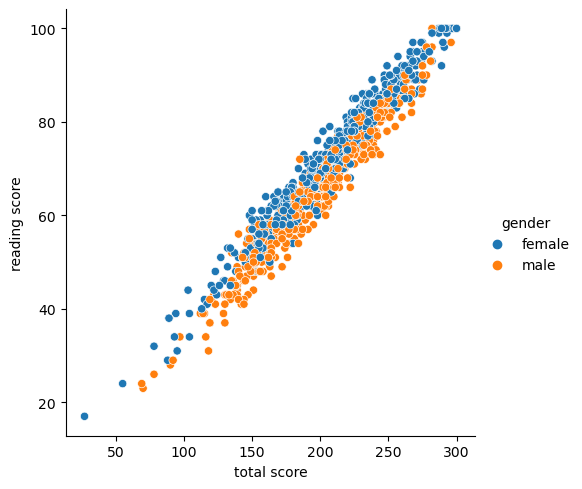

In [39]:
sns.relplot(data = df , x ="total score" , y = "reading score" , hue = "gender")

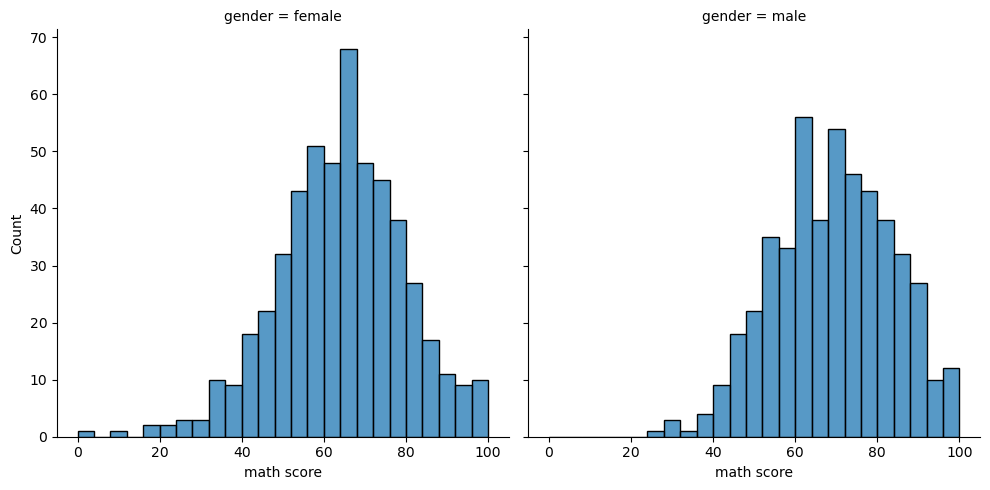

In [44]:
sns.displot(data = df , x = "math score" , kind="hist" , col="gender")

In [56]:
df[df["math score"] == 100]["gender"].count()

7

In [57]:
df[df["reading score"] == 100]["total score"].count()

17

In [58]:
df[df["writing score"] == 100]["total score"].count()


14

In [59]:
df[df["total score"] == 300]["total score"].count()


3

([<matplotlib.patches.Wedge at 0x29645297e50>,
 [Text(-0.07347412204716319, 1.2979220136007399, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.04521484433671581, 0.7987212391389167, '51.8%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.2%')])

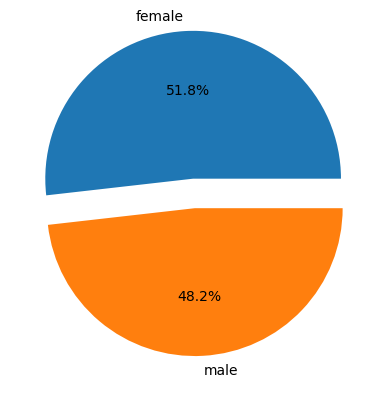

In [65]:
value_count = df["gender"].value_counts().values
labels = df["gender"].value_counts().index

plt.pie(x = value_count , labels= labels , autopct="%1.1f%%" ,explode=[0.2,0], )

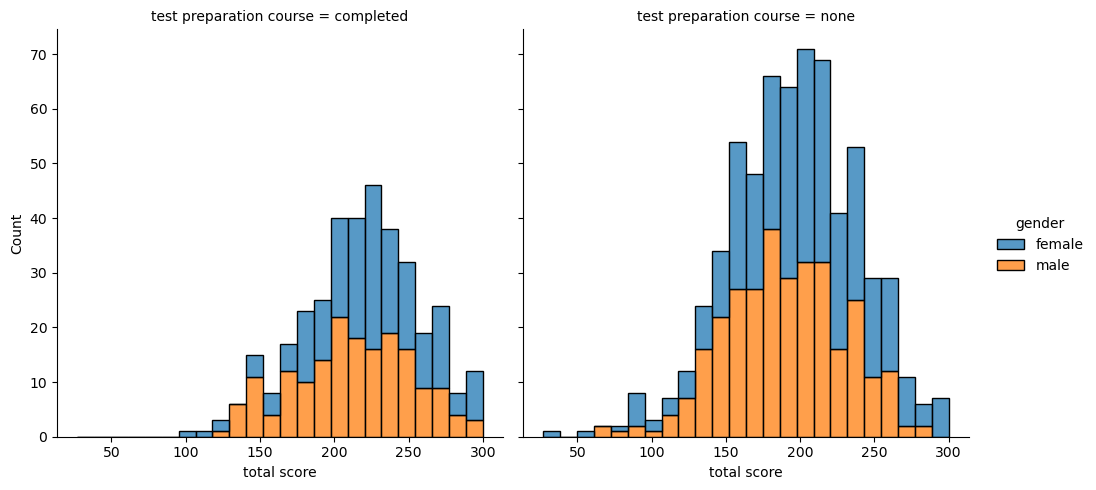

In [69]:
sns.displot(data = df , x = "total score", hue="gender" , col="test preparation course" , multiple = "stack")